In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start_time = time.time()

### Generating Data

In [3]:
# A simple function generating random predictors and responses!
def gen_data(start=2, end=100, step=2, add_noise=0):
    x = np.arange(start, end, step)
    y = 10 + 5*x
    
    if add_noise > 0:
        y = np.random.normal(y, add_noise)
        
    return x, y

### Cost Function

In [4]:
def cost_function(x, y, params):
    
    m = len(y)    
    
    squared_sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):
        op = ((params[0] + params[1]*xi) - y[i])**2
        squared_sum_of_errors += op

    cost = squared_sum_of_errors/(2*m)
    
    return cost

### Function to calculate Sum of Errors (formula)

In [5]:
def calculate_sum_of_errors(x, y, params, with_xi = False):
    
    m = len(y)
    sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):        
        if with_xi:
            op = ((params[0] + params[1]*xi) - y[i]) * xi
            sum_of_errors += op
        else:
            op = (params[0] + params[1]*xi) - y[i]
            sum_of_errors += op
    
    return sum_of_errors

### Gradient Descent Function

In [6]:
def gradient_descent(x, y, params, alpha, precision=0.5 , iterations=0):
    
    m = len(y)
    cost_history = list()
    first_iteration = True
    iterations = 0
    
    while True:
        
        sum_of_errors = calculate_sum_of_errors(x, y, params)
        sum_of_errors_xi = calculate_sum_of_errors(x, y, params, with_xi=True)
        
        temp0 = params[0] - alpha * 1/m * sum_of_errors
        temp1 = params[1] - alpha * 1/m * sum_of_errors_xi
                
        if np.isinf(temp0) or np.isinf(temp1):
            break
        
        params[0] = temp0
        params[1] = temp1
    
        curr_cost = cost_function(x, y, params)
                
#         print("theta0 = {} | theta1 = {} | curr_cost = {}".format(params[0],params[1], curr_cost))
            
        if curr_cost < precision:
            break
        
        
        if not(first_iteration) and (cost_history[-1] - curr_cost <= precision):
            break
        
        if first_iteration:
            first_iteration = False
    
        cost_history.append(curr_cost)
    
        iterations += 1
        
    return params, cost_history, iterations

### Intitializing the data variables

In [7]:
x, y = gen_data(start=2, end=100, add_noise=20)

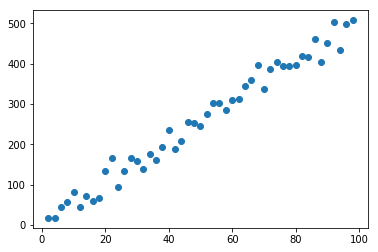

In [8]:
plt.scatter(x, y)

### Calculating cost on custom parameters

In [9]:
params = [1,1]
cost_function(x,y, params)

28249.98803240823

### Running the Gradient Descent

In [10]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000000000001, alpha=0.0006)

In [11]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 5.898746541873566 | theta1 = 5.045890896813032


### Plotting the regression line on newly obtained parameters from Gradient Descent

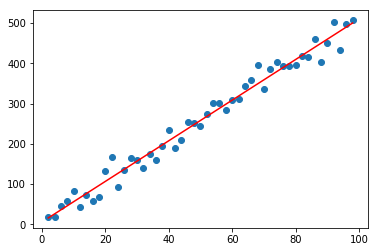

In [12]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

### Adding an outlier - high leverage point

In [13]:
x = np.concatenate((x,[80]))

In [14]:
y_w_outlier = np.concatenate((y,[-300]))

In [15]:
params = [1,1]
theta, cs, its = gradient_descent(x, y_w_outlier, params,precision=0.000001, alpha=0.0006)


In [16]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 1.0028313057280338 | theta1 = 0.8652228074678865


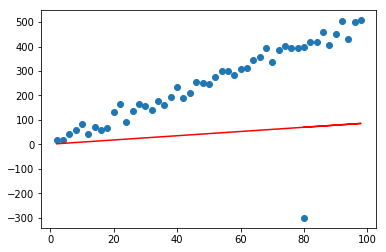

In [17]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y_w_outlier)
plt.plot(x, y_updated, color='r')

In [18]:
print("Total time taken by program: {} seconds ".format((time.time() - start_time)))

Total time taken by program: 10.96631121635437 seconds 
